Q2.1

In [16]:
#Code reference: https://gatech.instructure.com/courses/421726/files/52795101/download?download_frd=1
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

In [18]:
# Load the dataset
data = pd.read_csv("data/food-consumption.csv")
#print(data)
data.head()

#Extract features
features = data.columns[1:]
countries = data['Country']

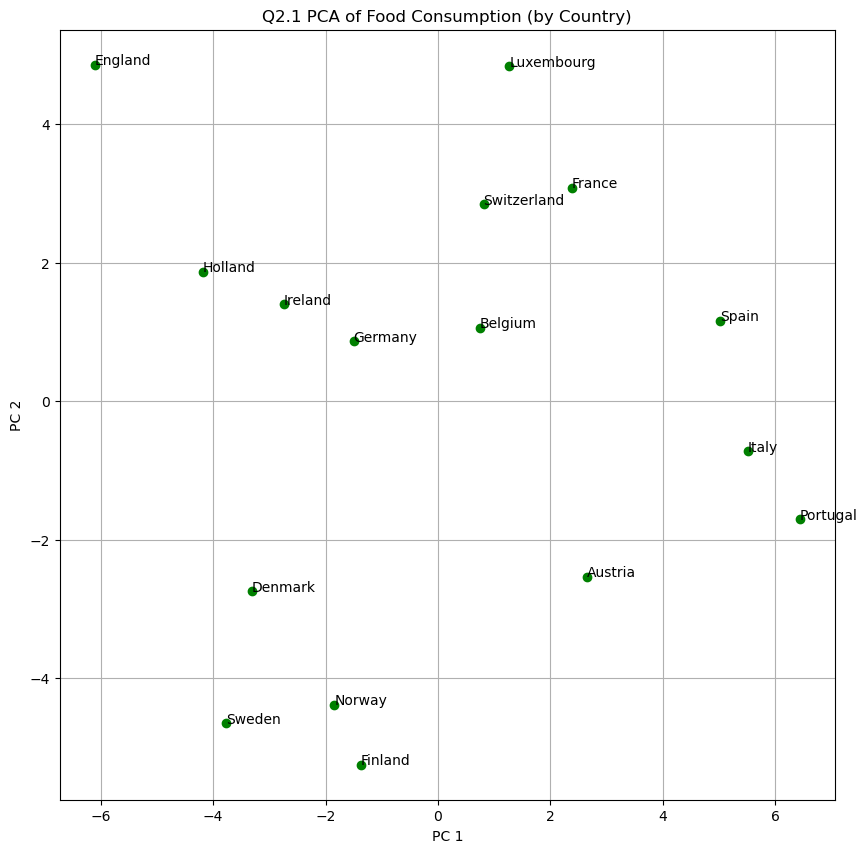

In [37]:
# Extract the food consumption data as a NumPy array
food_data_matrix = data[features].values

# PCA Function
food_mean_vector = np.mean(food_data_matrix, axis=0)  
mean_centered_data = food_data_matrix.T - food_mean_vector[:, None] 

U, S, V = np.linalg.svd(mean_centered_data)  

# To check the results are real 
U = U.real  
S = S.real  

# Find dimensions
dim1 = np.dot(U[:, 0].T, mean_centered_data) / np.sqrt(S[0])  
dim2 = np.dot(U[:, 1].T, mean_centered_data) / np.sqrt(S[1])

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dim1, dim2, color='green')  

for i in range(len(countries)):
    ax.annotate(countries[i], (dim1[i], dim2[i]))  

# Set plot title and axis labels
ax.set_title('Q2.1 PCA of Food Consumption (by Country)')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.grid(True)

fig.savefig('outputs/Q2.1.png')
plt.show()

Q2.2

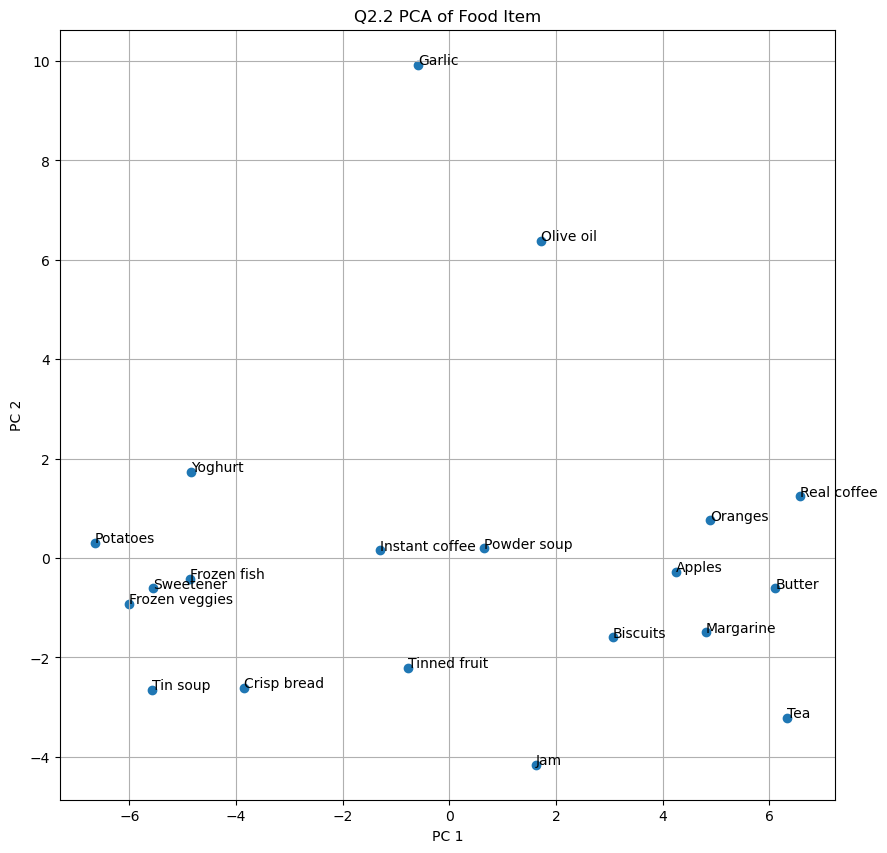

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
food_data = pd.read_csv('data/food-consumption.csv')
food_data.set_index('Country', inplace = True)

# Select columns
food_subset = food_data.loc[:, ['Garlic', 'Olive oil', 'Real coffee', 'Instant coffee', 'Tea',
                               'Sweetener', 'Biscuits', 'Powder soup', 'Tin soup', 'Potatoes',
                               'Frozen fish', 'Frozen veggies', 'Apples', 'Oranges', 'Tinned fruit',
                               'Jam', 'Butter', 'Margarine', 'Yoghurt', 'Crisp bread']]

# PCA - Calculate mean and reshape
food_mean = np.mean(food_subset, axis=1)
food_mean_reshaped = food_mean.values.reshape(-1, 1)
center_food2 = food_subset - food_mean_reshaped

# SVD
U_2, S_2, V_2 = np.linalg.svd(center_food2)
U_2 = U_2.real
S_2 = S_2.real

# Find dimensions
dim_1 = np.dot(U_2[:, 0].T, center_food2) / np.sqrt(S_2[0])
dim_2 = np.dot(U_2[:, 1].T, center_food2) / np.sqrt(S_2[1])

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dim_1, dim_2)

food_items = list(center_food2.columns)

for i in range(len(food_items)):
    name = food_items[i]
    ax.annotate(name, (dim_1[i], dim_2[i]))
    
ax.set_title('Q2.2 PCA of Food Item')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.grid(True)

# Save the plot
fig.savefig('outputs/Q2.2.png')
plt.show()
